In [1]:
import math
import datetime
import os, sys
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from IPython.display import Audio
import csv

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from torchsummary import summary

import cv2




# local files
sys.path.insert(0, '../')
import pyClient
import utils
import model
from model import Transition
import training

In [2]:
# Model parameters
BATCH_SIZE = 128 #original 128
DEVICE = 'cuda:0'

# Environment parameters
IMSIZE = 128
STACK_SIZE = 4
N_ACTIONS = 3
IP  = "127.0.0.1" # Ip address that the TCP/IP interface listens to
PORT = 13000       # Port number that the TCP/IP interface listens to


agent = model.DoubleDQNAgent(imsize=IMSIZE,
                 in_channels=STACK_SIZE,
                 n_actions=N_ACTIONS,
                 device=DEVICE)

environment = pyClient.Environment(ip = IP, port = PORT, size = IMSIZE) 

In [3]:
# Image processing
class ImageProcessor(object):
    def __init__(self, phosphene_resolution=None, imsize=128):
        """ @TODO 
        - Extended image processing
        """
        self.imsize = imsize
        if phosphene_resolution is not None:
            self.simulator = utils.PhospheneSimulator(phosphene_resolution=(phosphene_resolution,phosphene_resolution),
                                                     size=(128,128),
                                                     jitter=0.25,
                                                     intensity_var=0.9,
                                                     aperture=.66,
                                                     sigma=0.60,)
        else: 
            self.simulator = None
    
    def __call__(self,state_raw,):
        frame = environment.state2usableArray(state_raw)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = frame.astype('float32')
        if self.simulator is not None:
            frame = self.simulator(frame)
    
        return torch.Tensor(frame / 255.).view(1,1,self.imsize, self.imsize)



exp1_plain_phosNone_S0
exp1_plain_phosNone_S1
exp1_plain_phosNone_S2
exp1_plain_phosNone_S3
exp1_plain_phosNone_S4
exp1_plain_phos50_S0
exp1_plain_phos50_S1
exp1_plain_phos50_S2
exp1_plain_phos50_S3
exp1_plain_phos50_S4
exp1_plain_phos42_S0
exp1_plain_phos42_S1
exp1_plain_phos42_S2
exp1_plain_phos42_S3
exp1_plain_phos42_S4
exp1_plain_phos34_S0
exp1_plain_phos34_S1
exp1_plain_phos34_S2
exp1_plain_phos34_S3
exp1_plain_phos34_S4
exp1_plain_phos26_S0
exp1_plain_phos26_S1
exp1_plain_phos26_S2
exp1_plain_phos26_S3
exp1_plain_phos26_S4
exp1_plain_phos18_S0
exp1_plain_phos18_S1
exp1_plain_phos18_S2
exp1_plain_phos18_S3
exp1_plain_phos18_S4
exp1_plain_phos10_S0
exp1_plain_phos10_S1
exp1_plain_phos10_S2
exp1_plain_phos10_S3
exp1_plain_phos10_S4
exp1_complex_phosNone_S0
exp1_complex_phosNone_S1
exp1_complex_phosNone_S2
exp1_complex_phosNone_S3
exp1_complex_phosNone_S4
exp1_complex_phos50_S0
exp1_complex_phos50_S1
exp1_complex_phos50_S2
exp1_complex_phos50_S3
exp1_complex_phos50_S4
exp1_complex_ph

TypeError: to_csv() got an unexpected keyword argument 'ignore_index'

In [68]:
data.to_csv('Out/Exp1/_test_results.csv', index=False)

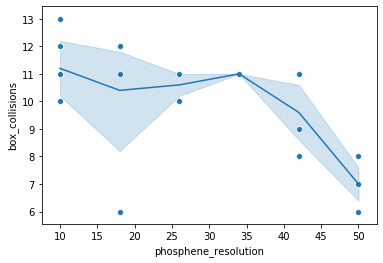

In [19]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(all_results)
data['phosphene_resolution'] = res
data['seed'] = s
data['total_collisions'] = data['box_collisions'] + data['wall_collisions']
# sns.lineplot(data=data, x='phosphene_resolution', y='box_collisions')
# sns.lineplot(data=data, x='phosphene_resolution', y='wall_collisions')
sns.lineplot(data=data, x='phosphene_resolution', y='box_collisions')
sns.scatterplot(data=data, x='phosphene_resolution', y='box_collisions')

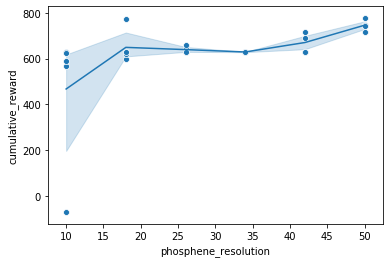

In [20]:
sns.lineplot(data=data, x='phosphene_resolution', y='cumulative_reward')
sns.scatterplot(data=data, x='phosphene_resolution', y='cumulative_reward')

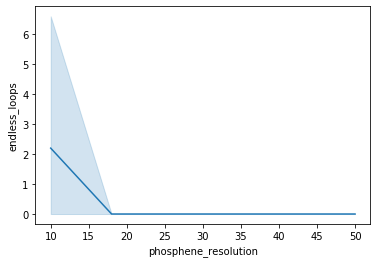

In [22]:
sns.lineplot(data=data, x='phosphene_resolution', y='endless_loops')

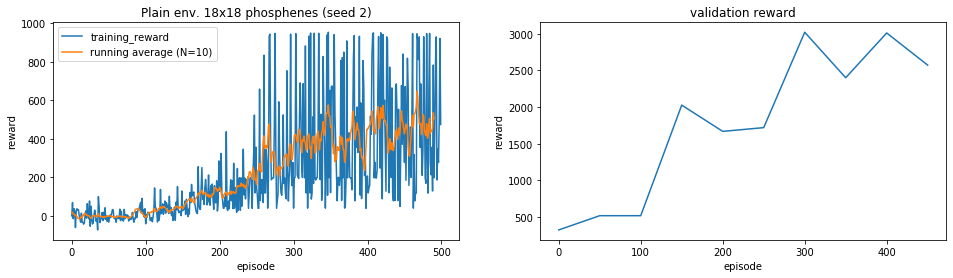

In [62]:
stats = pd.read_csv('./Out/Exp1/exp1_plain_phos18_S2_train_stats.csv')
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.lineplot(data= stats.loc[stats.validation==0],x='episode', y='reward')
plt.plot(np.convolve(stats.loc[stats.validation==0].reward,np.ones(10)/10,mode='valid'))
plt.title('Plain env. 18x18 phosphenes (seed 2)')
plt.legend(['training_reward', 'running average (N=10)'])
plt.subplot(1,2,2)
sns.lineplot(data= stats.loc[stats.validation==1],x='episode', y='reward')
plt.title("validation reward")
plt.show()

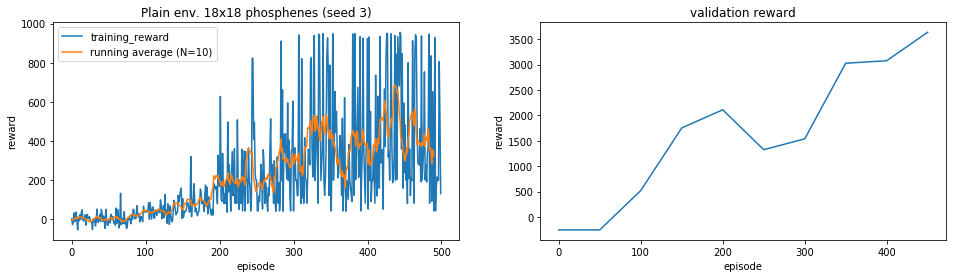

In [61]:
stats = pd.read_csv('./Out/Exp1/exp1_plain_phos18_S3_train_stats.csv')
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.lineplot(data= stats.loc[stats.validation==0],x='episode', y='reward')
plt.plot(np.convolve(stats.loc[stats.validation==0].reward,np.ones(10)/10,mode='valid'))
plt.title('Plain env. 18x18 phosphenes (seed 3)')
plt.legend(['training_reward', 'running average (N=10)'])
plt.subplot(1,2,2)
sns.lineplot(data= stats.loc[stats.validation==1],x='episode', y='reward')
plt.title("validation reward")
plt.show()